# Customer Analysis Final Round

## Case Study

A car insurance company has given a sample of their claim records in the form of a .csv file.
They want to know the expected amount the would be claim future customers.
For this, I will prepare the given data to create an algorithm capable of finding that amount. 

## Data Study

In [1]:
import pandas as pd
import numpy as np
import math

data = pd.read_csv('marketing_customer_analysis.csv')

This is an overview of the received information:

In [3]:
data

,Unnamed: 0,Customer,State,Customer Lifetime Value,Response,Coverage,Education,Effective To Date,EmploymentStatus,Gender,...,Number of Open Complaints,Number of Policies,Policy Type,Policy,Renew Offer Type,Sales Channel,Total Claim Amount,Vehicle Class,Vehicle Size,Vehicle Type
0,0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,...,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize,A
10906,10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,...,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize,A
10907,10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,...,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize,NaN
10908,10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,...,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize,A


In [4]:
data.shape

(10910, 26)

The table contains the data of 10910 customers, with information regarding the bacground of those customers (i.e. their state or their education level), the date until the end of contract (`Effective To Date`) and the information regarding the actual insurance contracted (type of policy, insured vehicle, etc).
At first glance, we can see several problems with the inputted data, as well as an automatically created column `Unnamed: 0`.

The information we need to predict corresponds to the column `Total Claim Amount`

## Cleaning the data

To be able to work properly with the given information, first I will need to treat the columns to make them easier to use:

In [5]:
data.columns

Index(['Unnamed: 0', 'Customer', 'State', 'Customer Lifetime Value',
       'Response', 'Coverage', 'Education', 'Effective To Date',
       'EmploymentStatus', 'Gender', 'Income', 'Location Code',
       'Marital Status', 'Monthly Premium Auto', 'Months Since Last Claim',
       'Months Since Policy Inception', 'Number of Open Complaints',
       'Number of Policies', 'Policy Type', 'Policy', 'Renew Offer Type',
       'Sales Channel', 'Total Claim Amount', 'Vehicle Class', 'Vehicle Size',
       'Vehicle Type'],
      dtype='object')

I will remove the index column 'Unnamed: 0' created automatically:

In [6]:
data = data.drop(['Unnamed: 0'], axis=1)
data.columns

Index(['Customer', 'State', 'Customer Lifetime Value', 'Response', 'Coverage',
       'Education', 'Effective To Date', 'EmploymentStatus', 'Gender',
       'Income', 'Location Code', 'Marital Status', 'Monthly Premium Auto',
       'Months Since Last Claim', 'Months Since Policy Inception',
       'Number of Open Complaints', 'Number of Policies', 'Policy Type',
       'Policy', 'Renew Offer Type', 'Sales Channel', 'Total Claim Amount',
       'Vehicle Class', 'Vehicle Size', 'Vehicle Type'],
      dtype='object')

Now I will make all column names into uppercase:

In [8]:
def columns_to_upper (table):
    table.columns = list(map(lambda x: x.upper(), table.columns))
    return table

In [9]:
data = columns_to_upper(data)
data.head()

,CUSTOMER,STATE,CUSTOMER LIFETIME VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE TO DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER OF OPEN COMPLAINTS,NUMBER OF POLICIES,POLICY TYPE,POLICY,RENEW OFFER TYPE,SALES CHANNEL,TOTAL CLAIM AMOUNT,VEHICLE CLASS,VEHICLE SIZE,VEHICLE TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Next step is removing spaces from the names to make them easier to use and to read

In [10]:
def remove_column_spaces(table):
    #Changes blank spaces into underscores for the names of the columns in "table"
    table.columns = list(map(lambda x: x.replace(" ","_"), table.columns))
    return table

In [11]:
data = remove_column_spaces(data)
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENTSTATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,VEHICLE_TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


For all the column names to be consistent I need to change 'EMPLOYMENTSTATUS' to 'EMPLOYMENT_STATUS'

In [12]:
data = data.rename(columns={'EMPLOYMENTSTATUS': 'EMPLOYMENT_STATUS'})
data.head()

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE,VEHICLE_TYPE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize,NaN
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize,NaN
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize,A
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize,A
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize,NaN


Now it is time to deal with the data that presents errors, here shown as NaN values:

In [13]:
data.isna().sum()


CUSTOMER                            0
STATE                             631
CUSTOMER_LIFETIME_VALUE             0
RESPONSE                          631
COVERAGE                            0
EDUCATION                           0
EFFECTIVE_TO_DATE                   0
EMPLOYMENT_STATUS                   0
GENDER                              0
INCOME                              0
LOCATION_CODE                       0
MARITAL_STATUS                      0
MONTHLY_PREMIUM_AUTO                0
MONTHS_SINCE_LAST_CLAIM           633
MONTHS_SINCE_POLICY_INCEPTION       0
NUMBER_OF_OPEN_COMPLAINTS         633
NUMBER_OF_POLICIES                  0
POLICY_TYPE                         0
POLICY                              0
RENEW_OFFER_TYPE                    0
SALES_CHANNEL                       0
TOTAL_CLAIM_AMOUNT                  0
VEHICLE_CLASS                     622
VEHICLE_SIZE                      622
VEHICLE_TYPE                     5482
dtype: int64

According to these results, I will drop the 'VEHICLE_TYPE' column, as half of its values are NaN

In [14]:
data = data.drop(['VEHICLE_TYPE'], axis=1)
data

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.0,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.0,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.0,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.0,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,NaN,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10905,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,NaN,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
10906,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.0,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
10907,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.0,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize
10908,WA60547,California,11971.977650,No,Premium,College,2/13/11,Employed,F,64195,...,27,4.0,6,Personal Auto,Personal L1,Offer1,Branch,618.288849,SUV,Medsize


As I have not done it before, I will remove duplicates

In [15]:
data = data.drop_duplicates()
data.isna().sum()

CUSTOMER                           0
STATE                            612
CUSTOMER_LIFETIME_VALUE            0
RESPONSE                         612
COVERAGE                           0
EDUCATION                          0
EFFECTIVE_TO_DATE                  0
EMPLOYMENT_STATUS                  0
GENDER                             0
INCOME                             0
LOCATION_CODE                      0
MARITAL_STATUS                     0
MONTHLY_PREMIUM_AUTO               0
MONTHS_SINCE_LAST_CLAIM          618
MONTHS_SINCE_POLICY_INCEPTION      0
NUMBER_OF_OPEN_COMPLAINTS        618
NUMBER_OF_POLICIES                 0
POLICY_TYPE                        0
POLICY                             0
RENEW_OFFER_TYPE                   0
SALES_CHANNEL                      0
TOTAL_CLAIM_AMOUNT                 0
VEHICLE_CLASS                    595
VEHICLE_SIZE                     595
dtype: int64

I will fill the NaN values in 'MONTHS_SINCE_LAST_CLAIM' and 'NUMBER_OF_OPEN_COMPLAINTS' with the means of those rows as they are numerical, and drop the remaining rows with NaN values in them.
I will do it in a copy of the variable to keep the original dataframe while I advance.

In [18]:
clean_data = data.copy()

In [19]:
mean_claim = data['MONTHS_SINCE_LAST_CLAIM'].mean()
clean_data['MONTHS_SINCE_LAST_CLAIM'] = clean_data['MONTHS_SINCE_LAST_CLAIM'].fillna(mean_claim)
mean_complains = data['NUMBER_OF_OPEN_COMPLAINTS'].mean()
clean_data['NUMBER_OF_OPEN_COMPLAINTS'] = clean_data['NUMBER_OF_OPEN_COMPLAINTS'].fillna(mean_complains)
clean_data.isna().sum()

CUSTOMER                           0
STATE                            612
CUSTOMER_LIFETIME_VALUE            0
RESPONSE                         612
COVERAGE                           0
EDUCATION                          0
EFFECTIVE_TO_DATE                  0
EMPLOYMENT_STATUS                  0
GENDER                             0
INCOME                             0
LOCATION_CODE                      0
MARITAL_STATUS                     0
MONTHLY_PREMIUM_AUTO               0
MONTHS_SINCE_LAST_CLAIM            0
MONTHS_SINCE_POLICY_INCEPTION      0
NUMBER_OF_OPEN_COMPLAINTS          0
NUMBER_OF_POLICIES                 0
POLICY_TYPE                        0
POLICY                             0
RENEW_OFFER_TYPE                   0
SALES_CHANNEL                      0
TOTAL_CLAIM_AMOUNT                 0
VEHICLE_CLASS                    595
VEHICLE_SIZE                     595
dtype: int64

In [20]:
clean_data = clean_data.dropna()
display(clean_data.shape)
clean_data.isna().sum()

(9676, 24)

CUSTOMER                         0
STATE                            0
CUSTOMER_LIFETIME_VALUE          0
RESPONSE                         0
COVERAGE                         0
EDUCATION                        0
EFFECTIVE_TO_DATE                0
EMPLOYMENT_STATUS                0
GENDER                           0
INCOME                           0
LOCATION_CODE                    0
MARITAL_STATUS                   0
MONTHLY_PREMIUM_AUTO             0
MONTHS_SINCE_LAST_CLAIM          0
MONTHS_SINCE_POLICY_INCEPTION    0
NUMBER_OF_OPEN_COMPLAINTS        0
NUMBER_OF_POLICIES               0
POLICY_TYPE                      0
POLICY                           0
RENEW_OFFER_TYPE                 0
SALES_CHANNEL                    0
TOTAL_CLAIM_AMOUNT               0
VEHICLE_CLASS                    0
VEHICLE_SIZE                     0
dtype: int64

After all the work, the index column might show gaps, so I will reset those indexes:

In [22]:
clean_data = clean_data.reset_index(drop=True)
clean_data

,CUSTOMER,STATE,CUSTOMER_LIFETIME_VALUE,RESPONSE,COVERAGE,EDUCATION,EFFECTIVE_TO_DATE,EMPLOYMENT_STATUS,GENDER,INCOME,...,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,TOTAL_CLAIM_AMOUNT,VEHICLE_CLASS,VEHICLE_SIZE
0,DK49336,Arizona,4809.216960,No,Basic,College,2/18/11,Employed,M,48029,...,52,0.000000,9,Corporate Auto,Corporate L3,Offer3,Agent,292.800000,Four-Door Car,Medsize
1,KX64629,California,2228.525238,No,Basic,College,1/18/11,Unemployed,F,0,...,26,0.000000,1,Personal Auto,Personal L3,Offer4,Call Center,744.924331,Four-Door Car,Medsize
2,LZ68649,Washington,14947.917300,No,Basic,Bachelor,2/10/11,Employed,M,22139,...,31,0.000000,2,Personal Auto,Personal L3,Offer3,Call Center,480.000000,SUV,Medsize
3,XL78013,Oregon,22332.439460,Yes,Extended,College,1/11/11,Employed,M,49078,...,3,0.000000,2,Corporate Auto,Corporate L3,Offer2,Branch,484.013411,Four-Door Car,Medsize
4,QA50777,Oregon,9025.067525,No,Premium,Bachelor,1/17/11,Medical Leave,F,23675,...,31,0.383939,7,Personal Auto,Personal L2,Offer1,Branch,707.925645,Four-Door Car,Medsize
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,QI63521,Nevada,19228.463620,No,Basic,High School or Below,2/24/11,Unemployed,M,0,...,32,0.000000,2,Personal Auto,Personal L2,Offer1,Branch,897.600000,Luxury SUV,Medsize
9672,FE99816,Nevada,15563.369440,No,Premium,Bachelor,1/19/11,Unemployed,F,0,...,40,0.383939,7,Personal Auto,Personal L1,Offer3,Web,1214.400000,Luxury Car,Medsize
9673,KX53892,Oregon,5259.444853,No,Basic,College,1/6/11,Employed,F,61146,...,68,0.000000,6,Personal Auto,Personal L3,Offer2,Branch,273.018929,Four-Door Car,Medsize
9674,TL39050,Arizona,23893.304100,No,Extended,Bachelor,2/6/11,Employed,F,39837,...,63,0.000000,2,Corporate Auto,Corporate L3,Offer1,Web,381.306996,Luxury SUV,Medsize


After the cleaning session it is time to look at the types of data we are working with:

In [10]:
data.dtypes

CUSTOMER                          object
STATE                             object
CUSTOMER_LIFETIME_VALUE          float64
RESPONSE                          object
COVERAGE                          object
EDUCATION                         object
EFFECTIVE_TO_DATE                 object
EMPLOYMENT_STATUS                 object
GENDER                            object
INCOME                             int64
LOCATION_CODE                     object
MARITAL_STATUS                    object
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM          float64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS        float64
NUMBER_OF_POLICIES                 int64
POLICY_TYPE                       object
POLICY                            object
RENEW_OFFER_TYPE                  object
SALES_CHANNEL                     object
TOTAL_CLAIM_AMOUNT               float64
VEHICLE_CLASS                     object
VEHICLE_SIZE                      object
VEHICLE_TYPE    

Which columns are numerical?


In [11]:
data._get_numeric_data().columns

Index(['CUSTOMER_LIFETIME_VALUE', 'INCOME', 'MONTHLY_PREMIUM_AUTO',
       'MONTHS_SINCE_LAST_CLAIM', 'MONTHS_SINCE_POLICY_INCEPTION',
       'NUMBER_OF_OPEN_COMPLAINTS', 'NUMBER_OF_POLICIES',
       'TOTAL_CLAIM_AMOUNT'],
      dtype='object')

Which columns are categorical?


In [12]:
data.select_dtypes(include=['object']).columns

Index(['CUSTOMER', 'STATE', 'RESPONSE', 'COVERAGE', 'EDUCATION',
       'EFFECTIVE_TO_DATE', 'EMPLOYMENT_STATUS', 'GENDER', 'LOCATION_CODE',
       'MARITAL_STATUS', 'POLICY_TYPE', 'POLICY', 'RENEW_OFFER_TYPE',
       'SALES_CHANNEL', 'VEHICLE_CLASS', 'VEHICLE_SIZE', 'VEHICLE_TYPE'],
      dtype='object')

Looking at the types, we can see that the `EFFECTIVE_TO_DATE` is treated as strings, but it can be changed into proper date formats:

In [24]:
clean_data['EFFECTIVE_TO_DATE'] = pd.to_datetime(clean_data['EFFECTIVE_TO_DATE'], errors='coerce')
clean_data['EFFECTIVE_TO_DATE']

0      2011-02-18
1      2011-01-18
2      2011-02-10
3      2011-01-11
4      2011-01-17
          ...    
9671   2011-02-24
9672   2011-01-19
9673   2011-01-06
9674   2011-02-06
9675   2011-02-13
Name: EFFECTIVE_TO_DATE, Length: 9676, dtype: datetime64[ns]

## Processing the data

Having dealt with the errors within the table (NaN values), I will focus in outliers: data that does not fit the general distribution in the table.

In [25]:
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline

To find those outliers, I need to know some statistical information:

In [25]:
clean_data.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_LIFETIME_VALUE,9676.0,7992.786138,6829.201406,1898.007675,4010.669676,5782.095838,8983.147788,83325.381190
INCOME,9676.0,37560.680860,30349.686902,0.000000,0.000000,33806.000000,62264.250000,99981.000000
MONTHLY_PREMIUM_AUTO,9676.0,93.269016,34.400115,61.000000,68.000000,83.000000,109.000000,298.000000
MONTHS_SINCE_LAST_CLAIM,9676.0,15.099622,9.787041,0.000000,7.000000,15.000000,23.000000,35.000000
MONTHS_SINCE_POLICY_INCEPTION,9676.0,48.065316,27.911300,0.000000,24.000000,48.000000,71.000000,99.000000
NUMBER_OF_OPEN_COMPLAINTS,9676.0,0.384363,0.884516,0.000000,0.000000,0.000000,0.383939,5.000000
NUMBER_OF_POLICIES,9676.0,2.975920,2.395978,1.000000,1.000000,2.000000,4.000000,9.000000
TOTAL_CLAIM_AMOUNT,9676.0,435.348164,291.624841,0.099007,272.152587,384.000000,550.203407,2893.239678
MONTH,9676.0,1.465275,0.498818,1.000000,1.000000,1.000000,2.000000,2.000000


As can be seen, only numerical columns have statistical information.
It is time to work separatedly on the numerical and non-numerical (categorical from now on):

In [26]:
clean_data.dtypes

CUSTOMER                                 object
STATE                                    object
CUSTOMER_LIFETIME_VALUE                 float64
RESPONSE                                 object
COVERAGE                                 object
EDUCATION                                object
EFFECTIVE_TO_DATE                datetime64[ns]
EMPLOYMENT_STATUS                        object
GENDER                                   object
INCOME                                    int64
LOCATION_CODE                            object
MARITAL_STATUS                           object
MONTHLY_PREMIUM_AUTO                      int64
MONTHS_SINCE_LAST_CLAIM                 float64
MONTHS_SINCE_POLICY_INCEPTION             int64
NUMBER_OF_OPEN_COMPLAINTS               float64
NUMBER_OF_POLICIES                        int64
POLICY_TYPE                              object
POLICY                                   object
RENEW_OFFER_TYPE                         object
SALES_CHANNEL                           

In [27]:
numerical = clean_data._get_numeric_data()
numerical.dtypes

CUSTOMER_LIFETIME_VALUE          float64
INCOME                             int64
MONTHLY_PREMIUM_AUTO               int64
MONTHS_SINCE_LAST_CLAIM          float64
MONTHS_SINCE_POLICY_INCEPTION      int64
NUMBER_OF_OPEN_COMPLAINTS        float64
NUMBER_OF_POLICIES                 int64
TOTAL_CLAIM_AMOUNT               float64
dtype: object

In [28]:
categorical = clean_data.select_dtypes(include=['object'])
categorical.dtypes

CUSTOMER             object
STATE                object
RESPONSE             object
COVERAGE             object
EDUCATION            object
EMPLOYMENT_STATUS    object
GENDER               object
LOCATION_CODE        object
MARITAL_STATUS       object
POLICY_TYPE          object
POLICY               object
RENEW_OFFER_TYPE     object
SALES_CHANNEL        object
VEHICLE_CLASS        object
VEHICLE_SIZE         object
dtype: object

For the numerical variables, I will check the multicollinearity between the features.   
Please remember that we will use the column `TOTAL_CLAIM_AMOUNT` later as the target variable.

In [29]:
def corr_heatmap(table):
    #Plots a correlations heatmap for a table
    #All the values must be numerical
    correlations_matrix = table.corr()
    sns.heatmap(correlations_matrix, annot=True)
    plt.show()

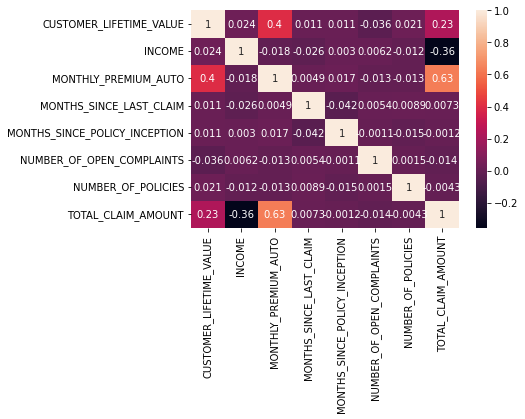

In [30]:
corr_heatmap(numerical)

As there are no correlations greater than 0.9 (the highest is 0.63 between `MONTHLY_PREMIUM_AUTO` and `TOTAL_CLAIM_AMOUNT`) I am not droping any  numerical columns.

For the categorical data, I have to transform it into numerical.

In [35]:
categorical.head()

,CUSTOMER,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY_TYPE,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,DK49336,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate Auto,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,KX64629,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal Auto,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,LZ68649,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal Auto,Personal L3,Offer3,Call Center,SUV,Medsize
3,XL78013,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate Auto,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,QA50777,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal Auto,Personal L2,Offer1,Branch,Four-Door Car,Medsize


In [36]:
categorical.POLICY_TYPE.unique()

array(['Corporate Auto', 'Personal Auto', 'Special Auto'], dtype=object)

In [37]:
categorical.POLICY.unique()

array(['Corporate L3', 'Personal L3', 'Personal L2', 'Corporate L2',
       'Personal L1', 'Special L1', 'Corporate L1', 'Special L3',
       'Special L2'], dtype=object)

As the information in `POLICY_TYPE` is included in `POLICY` I will drop the column `POLICY_TYPE`.
Also, the `CUSTOMER` column offer no important information as it is only an identifier, so I will drop it as well.

In [38]:
categorical = categorical.drop(['POLICY_TYPE', 'CUSTOMER'], axis=1)


In [39]:
categorical.head()

,STATE,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY,RENEW_OFFER_TYPE,SALES_CHANNEL,VEHICLE_CLASS,VEHICLE_SIZE
0,Arizona,No,Basic,College,Employed,M,Suburban,Married,Corporate L3,Offer3,Agent,Four-Door Car,Medsize
1,California,No,Basic,College,Unemployed,F,Suburban,Single,Personal L3,Offer4,Call Center,Four-Door Car,Medsize
2,Washington,No,Basic,Bachelor,Employed,M,Suburban,Single,Personal L3,Offer3,Call Center,SUV,Medsize
3,Oregon,Yes,Extended,College,Employed,M,Suburban,Single,Corporate L3,Offer2,Branch,Four-Door Car,Medsize
4,Oregon,No,Premium,Bachelor,Medical Leave,F,Suburban,Married,Personal L2,Offer1,Branch,Four-Door Car,Medsize


To make it easier to work on the categories, I want to divide them into the ones I want to apply One Hot encoding and the ones I want to apply Label encoding to.  
This division is based on whether the categories work as levels (for Label encoding) or descriptions (for One Hot encoding).

In [41]:
categorical_OH = categorical[['STATE','GENDER','LOCATION_CODE', 'MARITAL_STATUS', 'POLICY','SALES_CHANNEL', 'VEHICLE_CLASS']].copy()
categorical_label = categorical[['RESPONSE', 'COVERAGE', 'EDUCATION', 'EMPLOYMENT_STATUS', 'RENEW_OFFER_TYPE', 'VEHICLE_SIZE']].copy()

When translating categories into numbers, if those categories have the same importance, like gender or marital status, then One Hot encoding is used.  
This mean that for each different value in this columns, the encoder is going to create a column with a 1 in the row where that value is present.

In [42]:
categorical_OH

,STATE,GENDER,LOCATION_CODE,MARITAL_STATUS,POLICY,SALES_CHANNEL,VEHICLE_CLASS
0,Arizona,M,Suburban,Married,Corporate L3,Agent,Four-Door Car
1,California,F,Suburban,Single,Personal L3,Call Center,Four-Door Car
2,Washington,M,Suburban,Single,Personal L3,Call Center,SUV
3,Oregon,M,Suburban,Single,Corporate L3,Branch,Four-Door Car
4,Oregon,F,Suburban,Married,Personal L2,Branch,Four-Door Car
...,...,...,...,...,...,...,...
9671,Nevada,M,Suburban,Single,Personal L2,Branch,Luxury SUV
9672,Nevada,F,Suburban,Married,Personal L1,Web,Luxury Car
9673,Oregon,F,Urban,Married,Personal L3,Branch,Four-Door Car
9674,Arizona,F,Rural,Married,Corporate L3,Web,Luxury SUV


In [40]:
from sklearn.preprocessing import OneHotEncoder

In [43]:
encoder = OneHotEncoder().fit(categorical_OH)
encoded_for_p = encoder.transform(categorical_OH).toarray()

encoder.categories_
cols = [colname for row in encoder.categories_ for colname in row]

onehot_table = pd.DataFrame(encoded_for_p, columns=cols)
cols_to_drop = [row[0] for row in encoder.categories_]

onehot_table = onehot_table.drop(cols_to_drop,axis=1)
onehot_table

,California,Nevada,Oregon,Washington,M,Suburban,Urban,Married,Single,Corporate L2,...,Special L2,Special L3,Branch,Call Center,Web,Luxury Car,Luxury SUV,SUV,Sports Car,Two-Door Car
0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
3,0.0,0.0,1.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
9672,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0
9673,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9674,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0


For each of the columns encoded, one of the new columns can be calculated where the other have a value of 0. This mean that I can drop that specific column without losing any information, and make the final table lighter.

When the categories we need to transform work as levels (education level, employment status), Label encoding can be used.
This kind of encoding works by assigning a consecutive value to each category.

In [45]:
categorical_label

,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,No,Basic,College,Employed,Offer3,Medsize
1,No,Basic,College,Unemployed,Offer4,Medsize
2,No,Basic,Bachelor,Employed,Offer3,Medsize
3,Yes,Extended,College,Employed,Offer2,Medsize
4,No,Premium,Bachelor,Medical Leave,Offer1,Medsize
...,...,...,...,...,...,...
9671,No,Basic,High School or Below,Unemployed,Offer1,Medsize
9672,No,Premium,Bachelor,Unemployed,Offer3,Medsize
9673,No,Basic,College,Employed,Offer2,Medsize
9674,No,Extended,Bachelor,Employed,Offer1,Medsize


In [46]:
from sklearn.preprocessing import LabelEncoder

Using the line in this web
https://www.kite.com/python/answers/how-to-encode-labels-for-multiple-columns-with-scikit-learn-in-python
I can run the Label encoder in one go

In [47]:
label_table = categorical_label.copy()


label_table = label_table.apply(LabelEncoder().fit_transform)
label_table

,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,0,0,1,1,2,1
1,0,0,1,4,3,1
2,0,0,0,1,2,1
3,1,1,1,1,1,1
4,0,2,0,2,0,1
...,...,...,...,...,...,...
9671,0,0,3,4,0,1
9672,0,2,0,4,2,1
9673,0,0,1,1,1,1
9674,0,1,0,1,0,1


After making all columns numerical, I can merge them into a full table again:

In [48]:
final_table = pd.concat([numerical, onehot_table,label_table], axis=1)
final_table

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,TOTAL_CLAIM_AMOUNT,California,Nevada,...,Luxury SUV,SUV,Sports Car,Two-Door Car,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,4809.216960,48029,61,7.000000,52,0.000000,9,292.800000,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,2,1
1,2228.525238,0,64,3.000000,26,0.000000,1,744.924331,1.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,4,3,1
2,14947.917300,22139,100,34.000000,31,0.000000,2,480.000000,0.0,0.0,...,0.0,1.0,0.0,0.0,0,0,0,1,2,1
3,22332.439460,49078,97,10.000000,3,0.000000,2,484.013411,0.0,0.0,...,0.0,0.0,0.0,0.0,1,1,1,1,1,1
4,9025.067525,23675,117,15.143806,31,0.383939,7,707.925645,0.0,0.0,...,0.0,0.0,0.0,0.0,0,2,0,2,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,19228.463620,0,187,14.000000,32,0.000000,2,897.600000,0.0,1.0,...,1.0,0.0,0.0,0.0,0,0,3,4,0,1
9672,15563.369440,0,253,15.143806,40,0.383939,7,1214.400000,0.0,1.0,...,0.0,0.0,0.0,0.0,0,2,0,4,2,1
9673,5259.444853,61146,65,7.000000,68,0.000000,6,273.018929,0.0,0.0,...,0.0,0.0,0.0,0.0,0,0,1,1,1,1
9674,23893.304100,39837,201,11.000000,63,0.000000,2,381.306996,0.0,0.0,...,1.0,0.0,0.0,0.0,0,1,0,1,0,1


This table has numerical data in every column, but their ranges are very different. This will make predictions less accurate, but I can normalize the values to a common range:

#### Processing Data
- X-y split.
- Normalize (numerical).

As I have already worked on the numerical columns with the dataframe `numerical` I will be using it as a base to do the split.


In [49]:
from sklearn.preprocessing import MinMaxScaler

In [51]:
transformer = MinMaxScaler().fit(final_table)
table_normalized = transformer.transform(final_table)

table_normalized = pd.DataFrame(table_normalized, columns=final_table.columns)
table_normalized.describe().T

,count,mean,std,min,25%,50%,75%,max
CUSTOMER_LIFETIME_VALUE,9676.0,0.074849,0.083869,0.0,0.025945,0.047700,0.087012,1.0
INCOME,9676.0,0.375678,0.303555,0.0,0.000000,0.338124,0.622761,1.0
MONTHLY_PREMIUM_AUTO,9676.0,0.136156,0.145148,0.0,0.029536,0.092827,0.202532,1.0
MONTHS_SINCE_LAST_CLAIM,9676.0,0.431418,0.279630,0.0,0.200000,0.428571,0.657143,1.0
MONTHS_SINCE_POLICY_INCEPTION,9676.0,0.485508,0.281932,0.0,0.242424,0.484848,0.717172,1.0
NUMBER_OF_OPEN_COMPLAINTS,9676.0,0.076873,0.176903,0.0,0.000000,0.000000,0.076788,1.0
NUMBER_OF_POLICIES,9676.0,0.246990,0.299497,0.0,0.000000,0.125000,0.375000,1.0
TOTAL_CLAIM_AMOUNT,9676.0,0.150442,0.100799,0.0,0.094034,0.132694,0.190141,1.0
California,9676.0,0.345184,0.475453,0.0,0.000000,0.000000,1.000000,1.0
Nevada,9676.0,0.096424,0.295187,0.0,0.000000,0.000000,0.000000,1.0


This specific normalizing algorithm converts everything to values ranging from 0 to 1

Before applying the machine learning algorithm first I have to separate the objective column and the rest.
As mentioned before, our objective is to estimate the Total Claim Amount for new customers, so the split will be this:

In [52]:
# numerical
y = table_normalized['TOTAL_CLAIM_AMOUNT']
X = table_normalized.drop(['TOTAL_CLAIM_AMOUNT'], axis=1)
display(y)
X

0       0.101171
1       0.257445
2       0.165875
3       0.167263
4       0.244657
          ...   
9671    0.310217
9672    0.419717
9673    0.094333
9674    0.131763
9675    0.213674
Name: TOTAL_CLAIM_AMOUNT, Length: 9676, dtype: float64

,CUSTOMER_LIFETIME_VALUE,INCOME,MONTHLY_PREMIUM_AUTO,MONTHS_SINCE_LAST_CLAIM,MONTHS_SINCE_POLICY_INCEPTION,NUMBER_OF_OPEN_COMPLAINTS,NUMBER_OF_POLICIES,California,Nevada,Oregon,...,Luxury SUV,SUV,Sports Car,Two-Door Car,RESPONSE,COVERAGE,EDUCATION,EMPLOYMENT_STATUS,RENEW_OFFER_TYPE,VEHICLE_SIZE
0,0.035752,0.480381,0.000000,0.200000,0.525253,0.000000,1.000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.666667,0.5
1,0.004059,0.000000,0.012658,0.085714,0.262626,0.000000,0.000,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,1.00,1.000000,0.5
2,0.160264,0.221432,0.164557,0.971429,0.313131,0.000000,0.125,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.00,0.25,0.666667,0.5
3,0.250953,0.490873,0.151899,0.285714,0.030303,0.000000,0.125,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,1.0,0.5,0.25,0.25,0.333333,0.5
4,0.087527,0.236795,0.236287,0.432680,0.313131,0.076788,0.750,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,0.50,0.000000,0.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9671,0.212833,0.000000,0.531646,0.400000,0.323232,0.000000,0.125,0.0,1.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.75,1.00,0.000000,0.5
9672,0.167823,0.000000,0.810127,0.432680,0.404040,0.076788,0.750,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.00,1.00,0.666667,0.5
9673,0.041281,0.611576,0.016878,0.200000,0.686869,0.000000,0.625,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.25,0.25,0.333333,0.5
9674,0.270122,0.398446,0.590717,0.314286,0.636364,0.000000,0.125,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.5,0.00,0.25,0.000000,0.5


## Modeling

To apply Linear Regression (the algorithm I vill use for the estimations) I have to divide the data I have into a training portion and a test portion.  
The training portion is used to create the model, while the test portion is used to check how accurate that model is.

Train-test split

In [53]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split

In [54]:
y

0       0.101171
1       0.257445
2       0.165875
3       0.167263
4       0.244657
          ...   
9671    0.310217
9672    0.419717
9673    0.094333
9674    0.131763
9675    0.213674
Name: TOTAL_CLAIM_AMOUNT, Length: 9676, dtype: float64

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

After separating the data in training and testing sets, let's run the training

In [56]:
lm = linear_model.LinearRegression()
lm.fit(X_train,y_train)

LinearRegression()

## Validation of the model

To see how well the training has gone, these metrics can be of use:

In [57]:
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error


def metrics(X, y):
    #Finds and prints the metrics of the algorithm
    predictions = lm.predict(X)
    r2 = r2_score(y, predictions)
    print('R2:', r2)
    mse = np.sqrt(mean_squared_error(y,predictions))
    print('MSE:', mse)
    rmse = math.sqrt(mse)
    print('RMSE:', rmse)
    mae = mean_absolute_error(y, predictions)
    print('MAE:', mae)
    

In [58]:
metrics(X_test,y_test)

R2: 0.7777265920967282
MSE: 0.04656868426899686
RMSE: 0.21579778559799184
MAE: 0.032733214084641055


## Reporting